In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [42]:
df = pd.read_csv("emotion_dataset_2.csv")

In [43]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [23]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

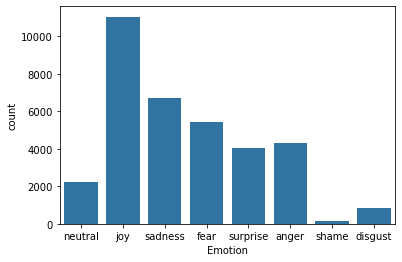

In [26]:
sns.countplot(x="Emotion",data=df)

In [39]:
## Preprocessing
import neattext.functions as nfx

In [40]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [44]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [45]:
x = df['Clean_Text']


In [46]:
y = df['Emotion']

In [ ]:
##Preprocessing Sentence detecting

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
#SpaCy: SpaCy is another popular NLP library that provides efficient and accurate sentence tokenization along with other NLP tasks. It is known for its speed and performance, especially on large datasets.
#Tokenizer provided by Deep Learning frameworks: Deep learning frameworks like TensorFlow and PyTorch also offer tokenization modules that can be used for sentence tokenization. These tokenizers are often part of larger NLP pipelines and can be fine-tuned for specific tasks.

#Custom Tokenization: In some cases, you may need to develop custom tokenization logic tailored to your specific text data and task requirements. This approach gives you more control over the tokenization process but may require more effort and expertise.


[nltk_data] Downloading package punkt to
[nltk_data]     /home/richforever/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
text = "Hello! How are you today? I hope you're doing well."  #splitting sentences
sentences = sent_tokenize(text)
print(sentences)

['Hello!', 'How are you today?', "I hope you're doing well."]


In [6]:
##Parsing

In [7]:
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')  # Download the POS tagger models


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/richforever/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
for sentence in sentences: #https://www.nltk.org/book/ch05.html reference
    words = word_tokenize(sentence)
    tagged_words = nltk.pos_tag(words) #nltk.pos_tag(words): This function performs POS tagging part of speech (e.g., noun, verb, adjective).
    print(tagged_words)

[('Hello', 'NN'), ('!', '.')]
[('How', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('today', 'NN'), ('?', '.')]
[('I', 'PRP'), ('hope', 'VBP'), ('you', 'PRP'), ("'re", 'VBP'), ('doing', 'VBG'), ('well', 'RB'), ('.', '.')]


In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

for sentence in sentences:
    doc = nlp(sentence)
    for sent in doc.sents:
        print(sent.text)

Hello!
How are you today?
I hope you're doing well.


In [11]:
from nltk.tree import Tree
def extract_attributes(tagged_sentence):
    phrases = []
    word, pos = tagged_sentence[0]
    for i, (word, pos) in enumerate(tagged_sentence):
    # Search for siblings (next/previous words)
        if pos == "JJ":  # Adjective
          for sibling_word, sibling_pos in tagged_sentence[i+1:]:
            if sibling_pos == "RB":  # Adverb as sibling
              phrases.append((word, sibling_word))
              break
        elif pos in ("NN", "NNS"):  # Noun (singular/plural)
          for sibling_word, sibling_pos in tagged_sentence[i+1:]:
            if sibling_pos in ("DT", "PRP$", "POS", "JJ", "CD", "ADJP", "QP", "NP"):
              # Collect following siblings until a specific tag is reached
              phrase = [word]
              while sibling_pos in ("DT", "PRP$", "POS", "JJ", "CD"):
                phrase.append(sibling_word)
                word, sibling_word, sibling_pos = tagged_sentence[i]
                i += 1

              phrases.append(tuple(phrase))
              break
        elif pos.startswith("VB"):  # Verb
          for sibling_word, sibling_pos in tagged_sentence[i+1:]:
            if sibling_pos.startswith("VB"):  # Verb as sibling
              phrases.append((word, sibling_word))
              break

    return phrases
    
tagged_words = [("The", "DT"), ("quick", "JJ"), ("brown", "JJ"), ("fox", "NN"), ("jumps", "VBZ"), ("over", "IN"), ("the", "DT"), ("lazy", "JJ"), ("dog", "NN")]
phrases = extract_attributes(tagged_words)
print(phrases)

ValueError: not enough values to unpack (expected 3, got 2)